In [1]:
# Analyst: Wendy Lawhead
# Project: Heart Disease Predictions
# Date: 10/26/2023

#Standard Libs
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns # visualization
import pandas as pd # data processing
import numpy as np # linear algebra

# Modeling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation Libs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Import dataset
df = pd.read_csv('data.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Examine data types and feature descriptions 

# age - Age in years

# sex - Sex of patient
# 1: male
# 2: female

# cp - Chest pain type (angina)
# 0: typical angina?
# 1: atypical?
# 2: non-anginal? 
# 3: asymptomatic?

# trestbps - Resting blood pressure (in mm Hg on admission to the hospital)

# chol - Serum cholestoral in mg/dl

# fbs - Fasting blood sugar
# 0: false
# 1: true

# restecg - Resting electrocardiographic results
# 0: Normal
# 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

# thalach - maximum heart rate achieved

# exang - Exercise induced angina 
# 0: No
# 1: Yes

# oldpeak - ST depression induced by exercisse relative to rest; ST depression in ECG at entry indicates severe coronary lesions and large benefits of an early invasive treatment strategy in unstable coronary artery disease; 

#slope - Slope of the peak exercise ST segment
# 0: up
# 1: flat
# 2: down

# ca - Number of major vessels (0-3) colored by flourosopy
# 0
# 1
# 2
# 4: drop from dataset!

#thal - Thalassemia (blood disorder) - Results of bloodflow observed via radioactive dye
# 0: drop from dataset!
# 1: reversible defect - Blood flow is observed but not normal
# 2: fixed defect - No blood flow in some part of heart
# 3: normal - Normal blood flow

# target
# 0: No disease
# 1: Disease

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# is there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Eliminate bad data
df = df[df['ca'] < 4] # Range is 0-3
df = df[df['thal'] > 0] # Range is 1-3


The length of the data now is 296 instead of 303


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.089820,-0.061405,0.288701,0.200920,0.133022,-0.112365,-0.395989,0.098051,0.199373,-0.161758,0.364229,0.063373,-0.225453
sex,-0.089820,1.000000,-0.048023,-0.059520,-0.193749,0.036981,-0.072303,-0.058293,0.140791,0.102641,-0.028719,0.088788,0.212017,-0.285322
cp,-0.061405,-0.048023,1.000000,0.044610,-0.067926,0.118337,0.039106,0.296621,-0.383902,-0.142159,0.104675,-0.226203,-0.162660,0.423425
trestbps,0.288701,-0.059520,0.044610,1.000000,0.126705,0.183658,-0.117539,-0.051817,0.070501,0.196793,-0.126742,0.102042,0.063773,-0.148922
chol,0.200920,-0.193749,-0.067926,0.126705,1.000000,0.014286,-0.142039,-0.001947,0.062132,0.042144,0.005572,0.119006,0.082496,-0.076541
fbs,0.133022,0.036981,0.118337,0.183658,0.014286,1.000000,-0.082361,-0.007155,-0.001863,0.007062,-0.046550,0.151259,-0.017891,-0.004680
restecg,-0.112365,-0.072303,0.039106,-0.117539,-0.142039,-0.082361,1.000000,0.030001,-0.065623,-0.055528,0.090915,-0.111317,-0.008723,0.131716
thalach,-0.395989,-0.058293,0.296621,-0.051817,-0.001947,-0.007155,0.030001,1.000000,-0.383671,-0.346742,0.388453,-0.267861,-0.111961,0.426655
exang,0.098051,0.140791,-0.383902,0.070501,0.062132,-0.001863,-0.065623,-0.383671,1.000000,0.287812,-0.248879,0.146783,0.224178,-0.425085
oldpeak,0.199373,0.102641,-0.142159,0.196793,0.042144,0.007062,-0.055528,-0.346742,0.287812,1.000000,-0.577779,0.292905,0.211675,-0.428804


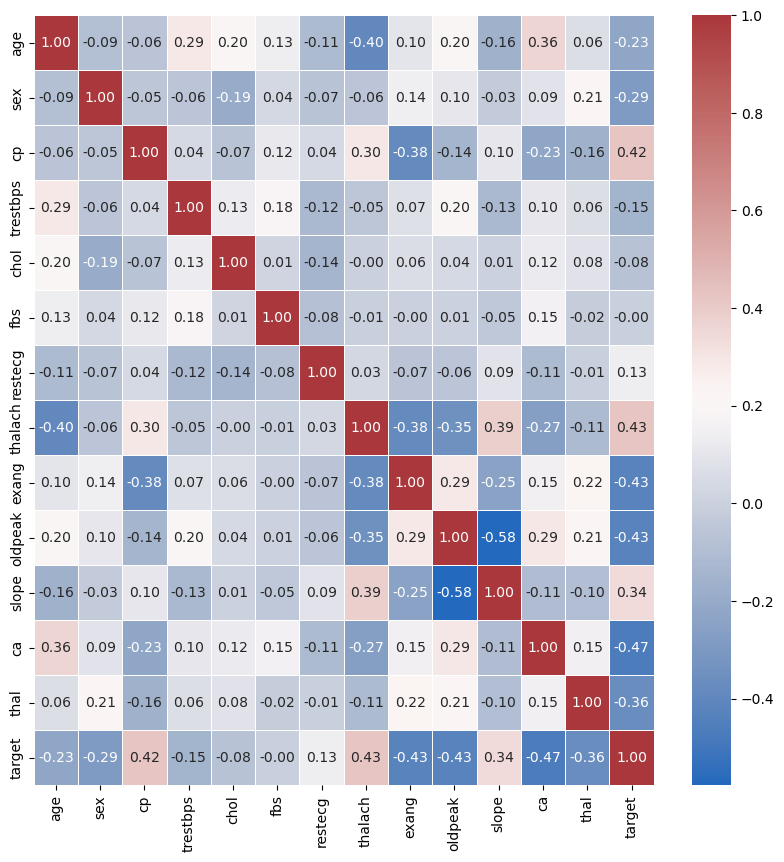

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, linewidth=0.5, fmt='0.2f', cmap=sns.color_palette("vlag", as_cmap=True)
);

In [12]:
# predictive modeling
# 1- KNeighborsClassifier
# 2- RandomForestClassifier
# 3- LogisticRegression

# Split data into features and target
X = df.drop('target', axis=1)
y = df.target

In [13]:
# split test and training data 
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
# create models
models = {'KNN': KNeighborsClassifier(),
          'RFC': RandomForestClassifier(random_state=0),
          'LR' : LogisticRegression(random_state=0)}

# create function to evaluate score
def fit_and_score(models, X_train, X_test , y_train , y_test):
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [15]:
model_score = fit_and_score(models=models, X_train=X_train, X_test=X_test , y_train=y_train , y_test=y_test)
model_score

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

{'KNN': 0.6, 'RFC': 0.8333333333333334, 'LR': 0.8666666666666667}

<AxesSubplot:>

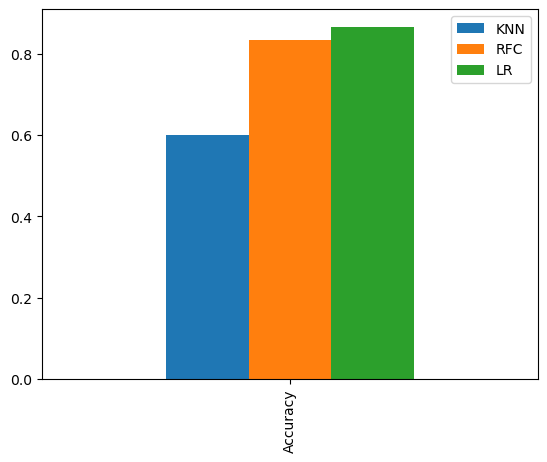

In [16]:
# model comparison
model_compare = pd.DataFrame(model_score, index = ['Accuracy'])
model_compare.plot.bar()

In [18]:
LR_hp = {'C': np.logspace(-4,4,20),
         'solver': ['liblinear', 'lbfgs']}

RFC_hp = {'n_estimators': np.arange(10,1600,100),
          'max_depth': [None, 3,5,6,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [19]:
# Tuning Logistic Regression
lr_gs = GridSearchCV(LogisticRegression(random_state=0),
                        param_grid = LR_hp,
                        cv = 5,
                        verbose = True)
# Fit
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [20]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
LR_hp = {'C': np.logspace(-4,4,20),
         'solver': ['liblinear', 'lbfgs']}

RFC_hp = {'n_estimators': np.arange(10,1600,100),
          'max_depth': [None, 3,5,6,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

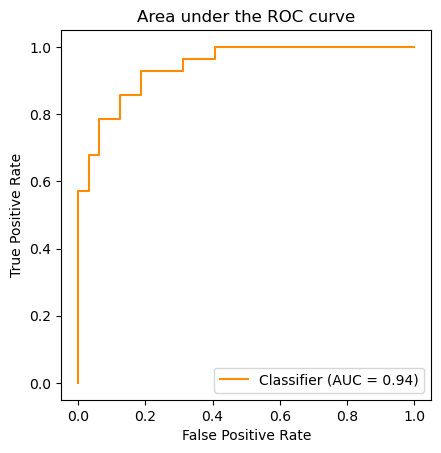

In [22]:
# Plot Area under the curve for lr_gs model
lrgs_predict = lr_gs.predict(X_test)
lrgs_predict_proba = lr_gs.predict_proba(X_test)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    lrgs_predict_proba[:, 1],
    color="darkorange")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area under the ROC curve")
plt.legend()
plt.show()

In [23]:
# confusion matrix
print(confusion_matrix(y_test,lrgs_predict))

[[26  6]
 [ 2 26]]


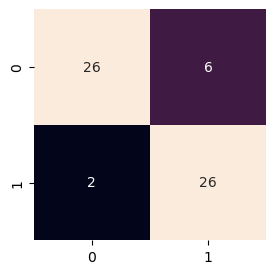

In [24]:
def plot_confusion(y_test,lrgs_predict):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,lrgs_predict),
                     annot =True,
                     cbar = False
                    )

plot_confusion(y_test,lrgs_predict)

In [25]:
# Classifican report
print(classification_report(y_test,lrgs_predict))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.81      0.93      0.87        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [26]:
# Tuning LR
lr = RandomizedSearchCV(LogisticRegression(random_state=0),
                        param_distributions = LR_hp,
                        cv = 5,
                        n_iter = 20,
                        verbose = True)
# Fit
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [27]:
lr.best_params_

{'solver': 'lbfgs', 'C': 1438.44988828766}

In [29]:
# cross validation accuracy
lr_new = LogisticRegression(solver= 'lbfgs', C= 1438.44988828766, random_state=0)

cv_accuracy = cross_val_score(lr_new, X, y, cv=7, scoring = 'accuracy')
cv_accuracy = cv_accuracy.mean()
cv_accuracy

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.8615725359911405

In [30]:
# cross validation precision
cv_precision = cross_val_score(lr_new, X, y, cv=7, scoring = 'precision')
cv_precision = cv_precision.mean()
cv_precision

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.846830626636795

In [31]:
# cross validation recall

cv_recall = cross_val_score(lr_new, X, y, cv=7, scoring = 'recall')
cv_recall = cv_recall.mean()
cv_recall

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.9130434782608694

In [32]:
# cross validation f1

cv_f1 = cross_val_score(lr_new, X, y, cv=7, scoring = 'f1')
cv_f1 = cv_f1.mean()
cv_f1

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.8761916610896313

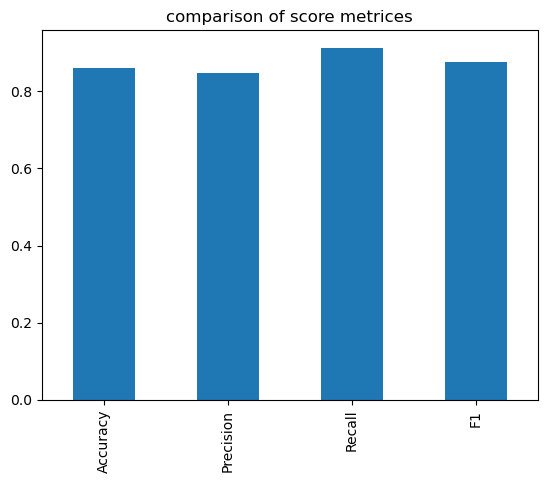

In [33]:
cv_plot = pd.DataFrame({'Accuracy': cv_accuracy,
                       'Precision': cv_precision,
                       'Recall': cv_recall,
                       'F1': cv_f1}, index=[0])
cv_plot.T.plot.bar(title='comparison of score metrices',
                 legend=False);

In [34]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
# Check Coefficient
lr_new.fit(X_train,y_train)
lr_new.coef_

C:\Users\egz2fzr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.03162918, -1.59013269,  0.71861149, -0.00744419, -0.00488342,
         0.02117829,  0.28042622,  0.02947145, -0.49563208, -0.5058254 ,
         0.50220431, -1.37464586, -1.15953492]])

In [36]:
final_coef = dict(zip(df.columns, list(lr_new.coef_[0])))
final_coef

{'age': 0.031629176183855794,
 'sex': -1.59013269367418,
 'cp': 0.7186114942060361,
 'trestbps': -0.00744419079022933,
 'chol': -0.004883416401995929,
 'fbs': 0.0211782921036387,
 'restecg': 0.28042621751039015,
 'thalach': 0.029471451098620583,
 'exang': -0.4956320833432974,
 'oldpeak': -0.5058253952785188,
 'slope': 0.5022043094839019,
 'ca': -1.3746458632843856,
 'thal': -1.1595349222474178}

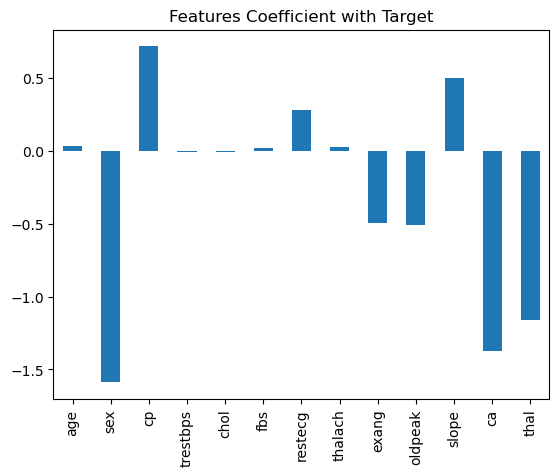

In [43]:
features = pd.DataFrame(final_coef, index=[0])
features.T.plot.bar(title='Features Coefficient with Target',legend=False);

<AxesSubplot:>

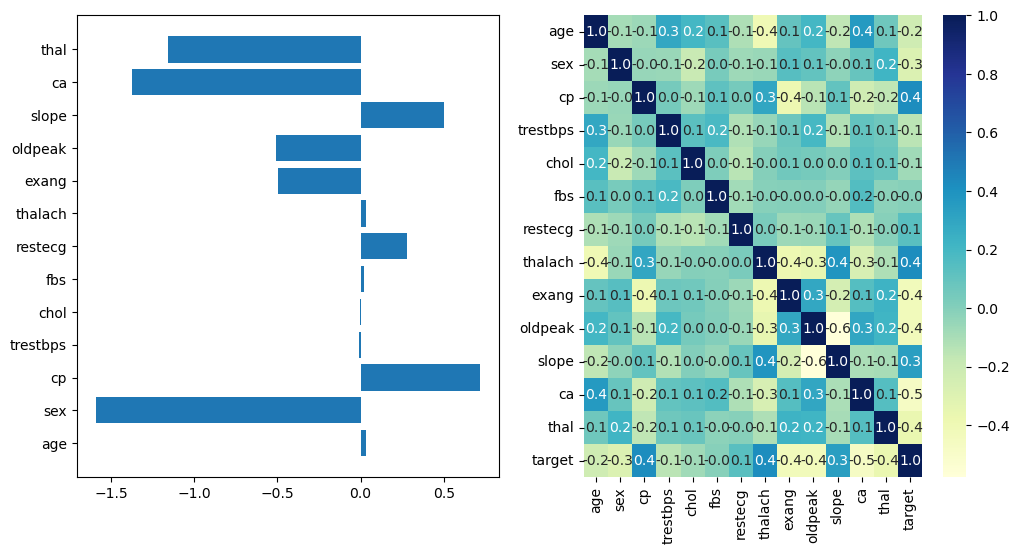

In [38]:
fig, (sub_plot1,sub_plot2) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))
sub_plot1.barh(list(final_coef.keys()),list(final_coef.values()));
sns.heatmap(df.corr(), annot=True, fmt='0.1f', cmap='YlGnBu', ax=sub_plot2)